x=[10 11 12 13 14 15 16 17 18 19]
noise y=[24.88395066 25.13544843 27.09629715 27.92975869 31.32829827 33.88790628
 35.09023577 35.6057274  37.86519343 39.6660173 ]
target y=[23.9 25.7 27.5 29.3 31.1 32.9 34.7 36.5 38.3 40.1]


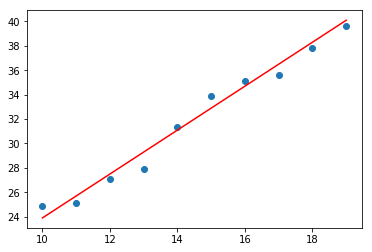

In [45]:
# 简单线性回归模型：因变量和自变量之间呈现简单的直线关系
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.arange(10,20) # 自变量，随便定义的

error=np.random.normal(size=x.shape)
y=1.8*x+5.9+error # 添加随机数作为噪音
print('x={}'.format(x))
print('noise y={}'.format(y))
print('target y={}'.format(1.8*x+5.9))

plt.scatter(x,y)
plt.plot(x,1.8*x+5.9,'-r') # 绘制的是红色的直线

x first 5: [ 9.94553639 11.67430807 12.34664703 11.69965383 15.51851188],
x last 5: [104.96860647 105.5657788  107.39973957 109.13188006 107.11399729]
train set first 3: [(87.14423520405674, 167.36573263695115), (55.67781082162659, 99.22823777086437), (66.59394694856373, 132.76688712312875)], last 3: [(101.17645506359409, 192.5625947080063), (84.26081861492051, 140.24466883845), (25.045565547096164, 30.8008361424697)]
test set first 3: [(70.59406981304555, 119.31318224915739), (57.91939805734182, 92.13834259220599), (96.47990086803438, 179.5012882066724)], last 3: [(102.0058216600241, 201.04210881463908), (18.172421360793678, 47.04372291312748), (104.96860647152728, 222.13041948920244)]
X_train first 3: [[87.1442352 ]
 [55.67781082]
 [66.59394695]]
y_train first 3: [[167.36573264]
 [ 99.22823777]
 [132.76688712]]


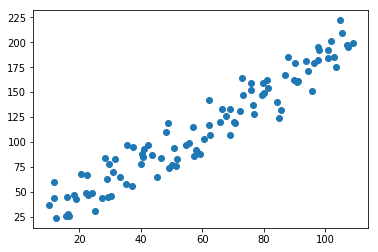

In [102]:
# ***************使用随机数据来构建简单线性回归器**********************************
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
np.random.seed(37) # 使得每次运行得到的随机数都一样

# 第一部分：准备数据集
# 一般的，数据集可以放置在一个专门的txt，或csv文件中，此处我自己创造一些数据
x=np.arange(10,110) 
x_shift=np.random.normal(size=x.shape)
x=x+x_shift # 构建的x含有100个数，通过在整数点引入偏差得到
print('x first 5: {},\nx last 5: {}'.format(x[:5],x[-5:]))

error=np.random.normal(size=x.shape)*15 # 构建误差作为噪音，*15是扩大噪音的影响
y=1.8*x+5.9+error
plt.scatter(x,y) # 可以查看生成的数据集的分布情况

# 要从这100个随机选择80个点来train，剩下的20个点来test
# 最简单的方法是调用下面的train_test_split函数
dataset=[(i,j) for i,j in zip(x,y)]
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(dataset,test_size=0.2,random_state=37)
print('train set first 3: {}, last 3: {}'.format(train_set[:3],train_set[-3:]))
print('test set first 3: {}, last 3: {}'.format(test_set[:3],test_set[-3:]))

# 第二种方法：也可以自己先shuffle,再随机选取
# np.random.shuffle(dataset) # 乱序排列
# train_set,test_set=dataset[:80],dataset[80:] 
# print('train set first 3: {}, last 3: {}'.format(train_set[:3],train_set[-3:]))
# print('test set first 3: {}, last 3: {}'.format(test_set[:3],test_set[-3:]))

X_train=np.array([i for (i,j) in train_set]).reshape(-1,1) # 后面的fit需要先reshape
y_train=np.array([j for (i,j) in train_set]).reshape(-1,1)
X_test= np.array([i for (i,j) in test_set]).reshape(-1,1)
y_test= np.array([j for (i,j) in test_set]).reshape(-1,1)
print('X_train first 3: {}'.format(X_train[:3]))
print('y_train first 3: {}'.format(y_train[:3]))

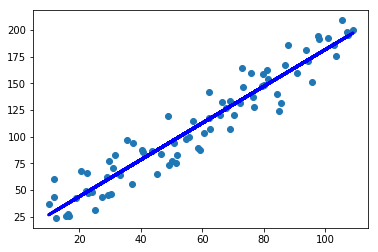

In [98]:
# 第二部分：使用train set进行模型训练
from sklearn import linear_model

linear_regressor=linear_model.LinearRegression() # 创建线性回归器对象
linear_regressor.fit(X_train,y_train) # 使用训练数据集训练该回归器对象

# 查看拟合结果
y_predict=linear_regressor.predict(X_train) # 使用训练后的回归器对象来拟合训练数据
plt.figure()
plt.scatter(X_train,y_train)
plt.plot(X_train,y_predict,'-b',linewidth=3)

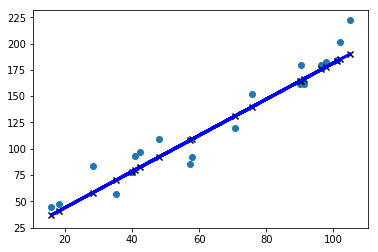

In [109]:
# 用训练好的模型计算测试集的数据，看是否能得到准确值
y_predict_test=linear_regressor.predict(X_test)
plt.figure()
plt.scatter(X_test,y_test)
plt.plot(X_test,y_predict_test,'-b',linewidth=3)
plt.scatter(X_test,y_predict_test,color='black',marker='x')

In [110]:
# 使用评价指标来评估模型的好坏
import sklearn.metrics as metrics
print('平均绝对误差：{}'.format(
    round(metrics.mean_absolute_error(y_predict_test,y_test),2)))
print('均方误差MSE：{}'.format(
    round(metrics.mean_squared_error(y_predict_test,y_test),2)))
print('中位数绝对误差：{}'.format(
    round(metrics.median_absolute_error(y_predict_test,y_test),2)))
print('解释方差分：{}'.format(
    round(metrics.explained_variance_score(y_predict_test,y_test),2)))
print('R方得分：{}'.format(
    round(metrics.r2_score(y_predict_test,y_test),2)))

平均绝对误差：11.98
均方误差MSE：211.52
中位数绝对误差：12.35
解释方差分：0.93
R方得分：0.92


In [134]:
# 回归模型的保存和加载

# 在保存之前先看一下模型的内部参数，主要为两项，截距和系数
print('直线的截距: {}'.format(linear_regressor.intercept_)) #这是截距
print('直线的系数（斜率）: {}'.format(linear_regressor.coef_)) #这系数，对应于本项目的直线斜率
y_value=linear_regressor.predict([[120]])
print('用线性模型计算的值：{}'
      .format(y_value)) # 这两个print的结果应该是一样的
print('直线方程计算的值：{}'
      .format(linear_regressor.coef_*120+linear_regressor.intercept_)) 

save_path='d:/Models/LinearRegressor_v1.txt'

# 第一种方法，pickle
import pickle
s=pickle.dumps(linear_regressor) # 模型保存
loaded_classifier=pickle.loads(s) # 模型加载
y_value=loaded_classifier.predict([[120]])
print('pickle加载后的模型计算结果：{}'.format(y_value))

# 第二种方法：joblib
from sklearn.externals import joblib
joblib.dump(linear_regressor,save_path) # 模型保存到文件中
loaded_classifier2=joblib.load(save_path)
y_value=loaded_classifier2.predict([[120]])
print('joblib加载后的模型计算结果：{}'.format(y_value))

直线的截距: [9.50824666]
直线的系数（斜率）: [[1.71905515]]
用线性模型计算的值：[[215.79486427]]
直线方程计算的值：[[215.79486427]]
pickle加载后的模型计算结果：[[215.79486427]]
joblib加载后的模型计算结果：[[215.79486427]]
